## Imports

In [1]:
import nltk
from pathlib import Path
import pandas as pd
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

### Figure 3a

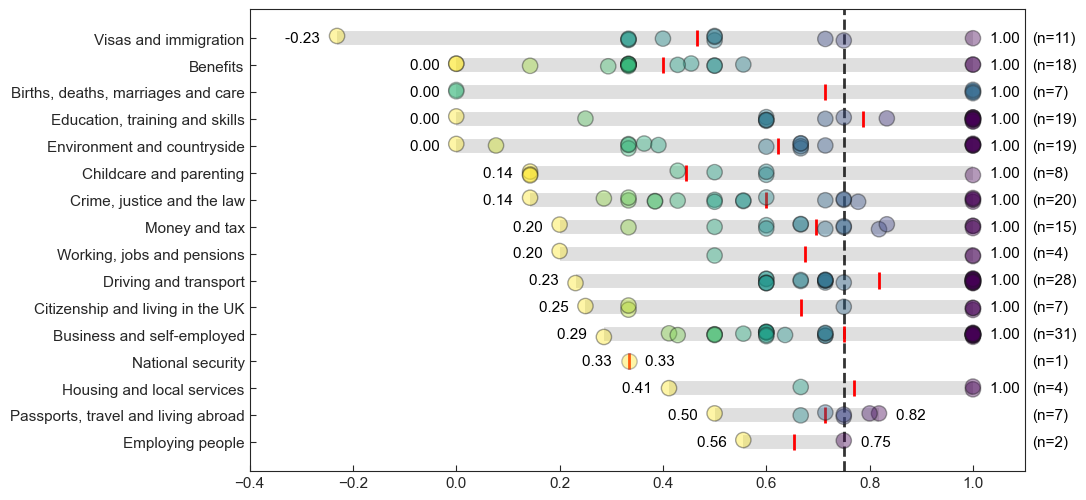

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

def plot_dot_plot(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Sort y-axis variables in ascending order according to the lowest RTI value
    sorted_topics = analysis_df.groupby('topic')['RTI'].min().sort_values(ascending=True).index

    # Switch the y and x-axis orientation
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks') 
    
    # Add a vertical red line at x=0.7 with alpha 0.7
    plt.axvline(x=0.75, color='black', linestyle='--', alpha=0.8, linewidth=2)

    # Iterate through unique topics in the sorted order
    for topic in sorted_topics:
        topic_data = analysis_df[analysis_df['topic'] == topic]['RTI']

        # Plot the stripplot
        sns.stripplot(x=topic_data, y=[topic]*len(topic_data), 
                      jitter=True,
                      linewidth=1, alpha=.4,
                      palette='viridis_r', size=11,
                      hue=topic_data)
        
        # Add numbers for the minimum and maximum values
        min_value = topic_data.min()
        max_value = topic_data.max()
        plt.text(min_value, topic, f'{min_value:.2f}    ', color='black', va='center', ha='right', fontsize=11)
        plt.text(max_value, topic, f'    {max_value:.2f}', color='black', va='center', ha='left', fontsize=11)

        # Add a light grey rectangle spanning the range of data points
        plt.fill_betweenx(y=topic, x1=min_value, x2=max_value, color='gray', alpha=0.25, linewidth=10)

        # Add the count of services (n=x) to each topic on the y-axis
        service_count = len(analysis_df[analysis_df['topic'] == topic])
        plt.text(1.115, topic, f'(n={service_count})', color='black', va='center', ha='left', fontsize=11)        
        
        # Get the y-axis positions for each topic
        y_axis_positions = plt.gca().get_yticks()

        # Find the position for the current topic
        y_position = y_axis_positions[list(sorted_topics).index(topic)]

        # Calculate the mean for the topic's data
        mean_value = topic_data.mean()

        # Calculate the height of each data point
        data_point_height = 0.6  # You may adjust this value

        # Draw a vertical line at the mean value with the same height as data points
        plt.vlines(x=mean_value, ymin=y_position - data_point_height / 2, ymax=y_position + data_point_height / 2,
                   color='red', linestyle='-', linewidth=2)

    # Use the viridis color palet
        
    # Use the viridis color palette with reversed order for each topic
    sns.set_palette(sns.color_palette('viridis_r', n_colors=len(analysis_df['topic'].unique())))

    # Add inward-facing major and minor tick marks to all axes
    plt.tick_params(axis='both', which='major', length=4, direction='in')
    plt.tick_params(axis='both', which='minor', length=8, direction='in')

    # Display the plot
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-0.4, 1.1)
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.legend([], [], frameon=False)

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/fig3a.png"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_dot_plot(save=True)

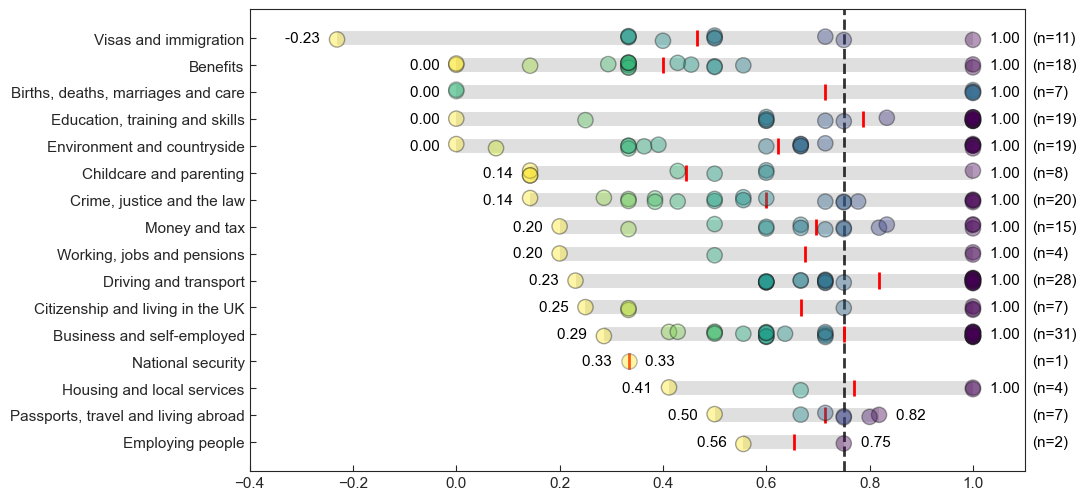

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

def plot_dot_plot(save=True):
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Sort y-axis variables in ascending order according to the lowest RTI value
    sorted_topics = analysis_df.groupby('topic')['RTI'].min().sort_values(ascending=True).index

    # Switch the y and x-axis orientation
    plt.figure(figsize=(10, 6))
    sns.set_style('ticks') 
    
    # Add a vertical red line at x=0.75 with alpha 0.8
    plt.axvline(x=0.75, color='black', linestyle='--', alpha=0.8, linewidth=2)

    # Iterate through unique topics in the sorted order
    for topic in sorted_topics:
        topic_data = analysis_df[analysis_df['topic'] == topic]['RTI']


        # Plot the stripplot
        sns.stripplot(x=topic_data, y=[topic]*len(topic_data), 
                      jitter=True,
                      linewidth=1, alpha=.4,
                      palette='viridis_r', size=11,
                      hue=topic_data)

        # Add numbers for the minimum and maximum values
        min_value = topic_data.min()
        max_value = topic_data.max()
        plt.text(min_value, topic, f'{min_value:.2f}    ', color='black', va='center', ha='right', fontsize=11)
        plt.text(max_value, topic, f'    {max_value:.2f}', color='black', va='center', ha='left', fontsize=11)

        # Add a light grey rectangle spanning the range of data points
        plt.fill_betweenx(y=topic, x1=min_value, x2=max_value, color='gray', alpha=0.25, linewidth=10)

        # Add the count of services (n=x) to each topic on the y-axis
        service_count = len(analysis_df[analysis_df['topic'] == topic])
        plt.text(1.115, topic, f'(n={service_count})', color='black', va='center', ha='left', fontsize=11)        

        # Get the y-axis positions for each topic
        y_axis_positions = plt.gca().get_yticks()

        # Find the position for the current topic
        y_position = y_axis_positions[list(sorted_topics).index(topic)]

        # Calculate the mean for the topic's data
        mean_value = topic_data.mean()

        # Calculate the height of each data point
        data_point_height = 0.6  # You may adjust this value

        # Draw a vertical line at the mean value with the same height as data points
        plt.vlines(x=mean_value, ymin=y_position - data_point_height / 2, ymax=y_position + data_point_height / 2,
                   color='red', linestyle='-', linewidth=2)

    # Use the viridis color palette with reversed order for each topic
    sns.set_palette(sns.color_palette('viridis_r', n_colors=len(analysis_df['topic'].unique())))

    # Add inward-facing major and minor tick marks to all axes
    plt.tick_params(axis='both', which='major', length=4, direction='in')
    plt.tick_params(axis='both', which='minor', length=8, direction='in')

    # Display the plot
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.xlim(-0.4, 1.1)
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.legend([], [], frameon=False)

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/fig3a.png"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_dot_plot(save=True)

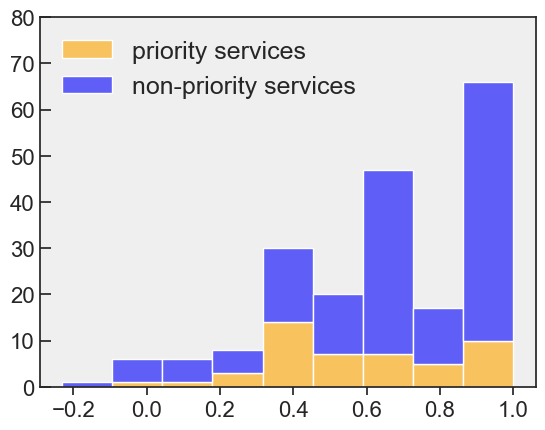

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_histogram_ast(save=False):
    
    # Load dataframe
    analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

    # Set style and context
    sns.set(style="ticks")
    sns.set_context("notebook", rc={"axes.labelsize": 16, "xtick.labelsize": 16, "ytick.labelsize": 16})

    # Create a histogram with stacked bars and specify colors
    sns.histplot(data=analysis_df, x="RTI", hue='priority', multiple="stack", palette={False: 'blue', True: 'orange'}, alpha=.6)

    # Increase legend font size, remove title, and modify labels
    plt.legend(['priority services', 'non-priority services'], title='', fontsize=18, frameon=False)
    plt.xlabel('', fontsize=12)
    plt.ylabel('', fontsize=12)
    plt.ylim(0,80)
    
    # Set the face color
    plt.gca().set_facecolor('#efefef')

    # Add inward-facing major and minor tick marks to all axes
    plt.tick_params(axis='y', which='major', length=8, direction='in')
    plt.tick_params(axis='y', which='minor', length=12, direction='in')

    # Save figure
    if save:
        plt.savefig(Path("../reports/figures/fig3a-inset.png"), dpi=1200, bbox_inches='tight')
    else:
        plt.show()

plot_histogram_ast(save=True)

### Figure 3b

### Figure 3c

<Axes: xlabel='task_count_group', ylabel='RTI'>

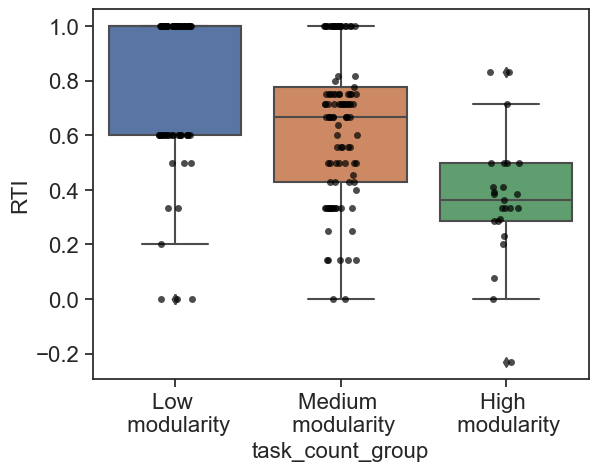

In [220]:
# Load dataframe
analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

# Define the bin edges
bins = [0, 5, 11, 25]

# Define the bin labels
labels = ['Low \n modularity', 'Medium \n modularity', 'High \n modularity']

# Create a new column 'task_count_group' with the assigned groups
analysis_df['task_count_group'] = pd.cut(analysis_df['task_count'], bins=bins, 
                                         labels=labels, 
                                         include_lowest=True)

sns.boxplot(data=analysis_df, x='task_count_group', y='RTI', dodge=True)
sns.stripplot(data=analysis_df, x='task_count_group', y='RTI', dodge=True, alpha=.7, color='black')

### Figure 3d